GridSpec(6, 6)

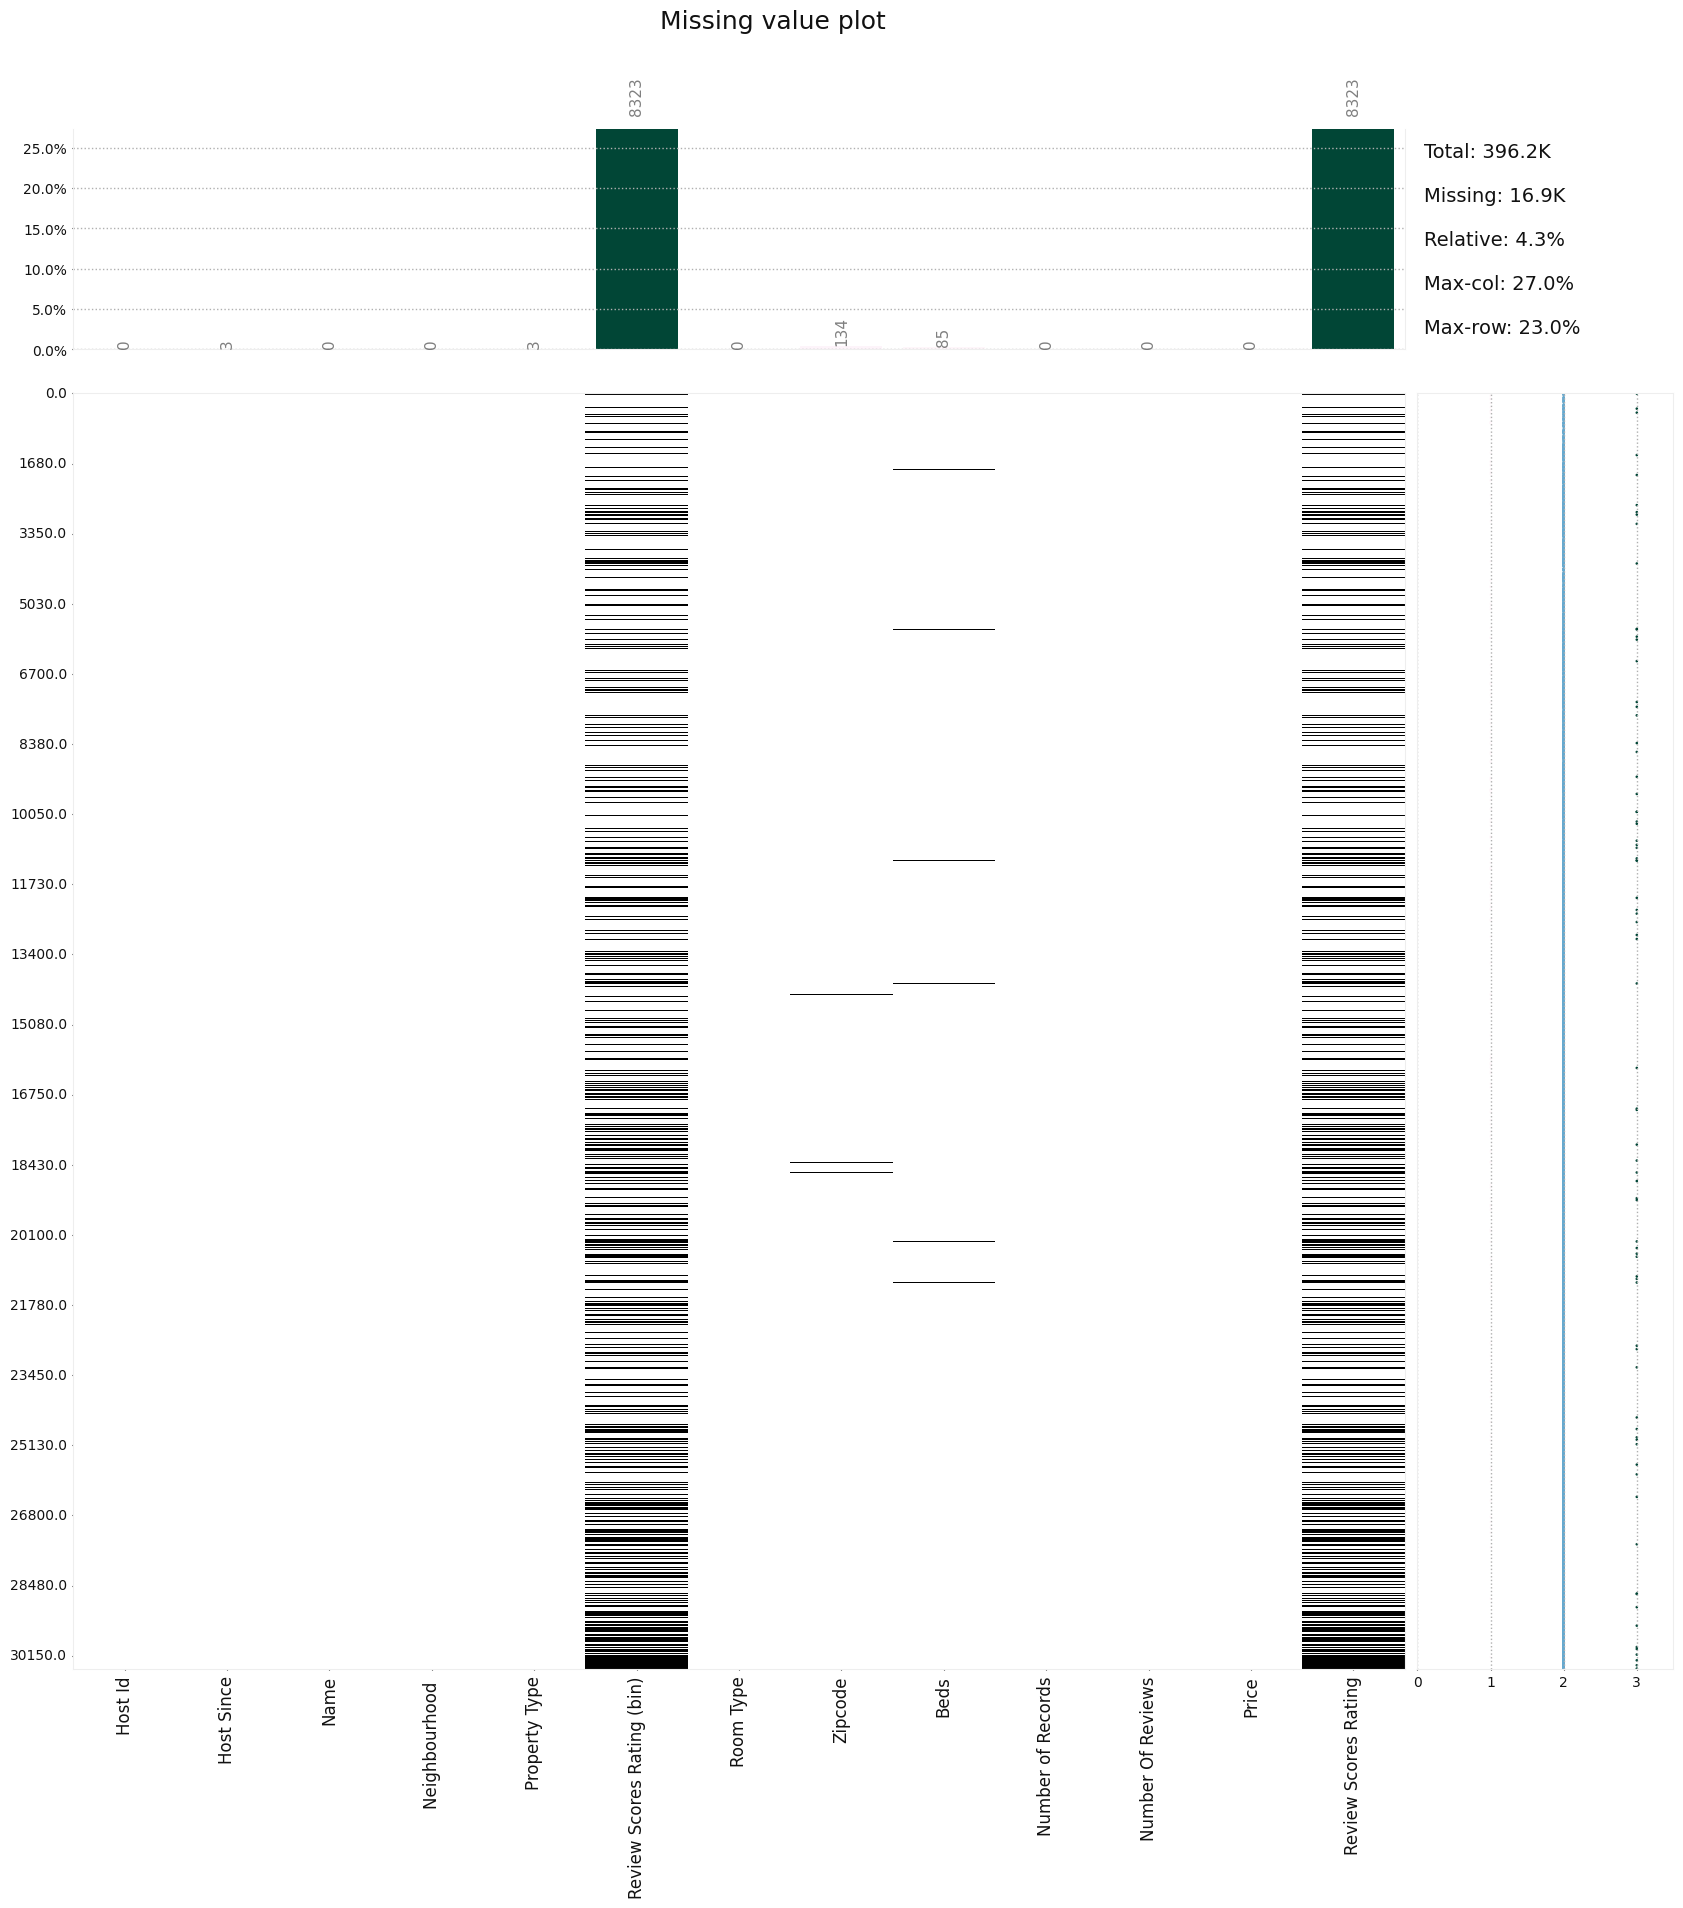

In [1]:
# tiktok:@romeo_ai_2024
# email: romeo10209818@gmail.com|| rnumagyarko@gmail.com || rnumagyarko@icloud.com
# IG:@romeonumagyarko
# X:@numromeo
# airbnb Dataset
import klib
import pandas as pd

df = pd.read_excel("airbnb.xlsx")
klib.missingval_plot(df)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Host Id                     30478 non-null  int64         
 1   Host Since                  30475 non-null  datetime64[ns]
 2   Name                        30478 non-null  object        
 3   Neighbourhood               30478 non-null  object        
 4   Property Type               30475 non-null  object        
 5   Review Scores Rating (bin)  22155 non-null  float64       
 6   Room Type                   30478 non-null  object        
 7   Zipcode                     30344 non-null  float64       
 8   Beds                        30393 non-null  float64       
 9   Number of Records           30478 non-null  int64         
 10  Number Of Reviews           30478 non-null  int64         
 11  Price                       30478 non-null  int64     

In [3]:
df_cleaned = klib.data_cleaning(df)

Shape of cleaned data: (30461, 12) - Remaining NAs: 16843


Dropped rows: 17
     of which 17 duplicates. (Rows (first 150 shown): [31, 6313, 8571, 21337, 21702, 22557, 22558, 22568, 23764, 23858, 23859, 28573, 29210, 29211, 29213, 29714, 29731])

Dropped columns: 1
     of which 1 single valued.     Columns: ['number_of_records']
Dropped missing values: 28
Reduced memory by at least: 1.77 MB (-58.61%)



In [4]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30461 entries, 0 to 30460
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   host_id                   30461 non-null  int32         
 1   host_since                30458 non-null  datetime64[ns]
 2   name                      30461 non-null  object        
 3   neighbourhood             30461 non-null  category      
 4   property_type             30458 non-null  category      
 5   review_scores_rating_bin  22152 non-null  float32       
 6   room_type                 30461 non-null  category      
 7   zipcode                   30327 non-null  float32       
 8   beds                      30376 non-null  float32       
 9   number_of_reviews         30461 non-null  int16         
 10  price                     30461 non-null  int16         
 11  review_scores_rating      22152 non-null  float32       
dtypes: category(3), da

In [5]:
df_cleaned.isnull().sum()

host_id                        0
host_since                     3
name                           0
neighbourhood                  0
property_type                  3
review_scores_rating_bin    8309
room_type                      0
zipcode                      134
beds                          85
number_of_reviews              0
price                          0
review_scores_rating        8309
dtype: int64

In [6]:
df_cleaned['property_type'].fillna(df_cleaned['property_type'].mode()[0],inplace=True)

C:\Users\R\AppData\Local\Temp\ipykernel_5036\1847034836.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['property_type'].fillna(df_cleaned['property_type'].mode()[0],inplace=True)


In [7]:
df_cleaned.beds = df_cleaned.beds.fillna(df_cleaned.beds.mean())
df_cleaned.review_scores_rating = df_cleaned.fillna(df_cleaned.review_scores_rating.mean())

TypeError: Cannot setitem on a Categorical with a new category (91.99304962158203), set the categories first

In [8]:
df_cleaned.isnull().sum()

host_id                        0
host_since                     3
name                           0
neighbourhood                  0
property_type                  0
review_scores_rating_bin    8309
room_type                      0
zipcode                      134
beds                           0
number_of_reviews              0
price                          0
review_scores_rating        8309
dtype: int64

In [9]:
df_cleaned.review_scores_rating = df_cleaned.review_scores_rating.fillna(df_cleaned.review_scores_rating.mean())

In [10]:
df_cleaned.isnull().sum()

host_id                        0
host_since                     3
name                           0
neighbourhood                  0
property_type                  0
review_scores_rating_bin    8309
room_type                      0
zipcode                      134
beds                           0
number_of_reviews              0
price                          0
review_scores_rating           0
dtype: int64

In [11]:
df_cleaned.head()

,host_id,host_since,name,neighbourhood,property_type,review_scores_rating_bin,room_type,zipcode,beds,number_of_reviews,price,review_scores_rating
0,5162530,NaT,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,0,145,91.99305
1,33134899,NaT,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,37,91.99305
2,39608626,NaT,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,28,91.99305
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,0,199,91.99305
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,39,549,96.00000


In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30461 entries, 0 to 30460
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   host_id                   30461 non-null  int32         
 1   host_since                30458 non-null  datetime64[ns]
 2   name                      30461 non-null  object        
 3   neighbourhood             30461 non-null  category      
 4   property_type             30461 non-null  category      
 5   review_scores_rating_bin  22152 non-null  float32       
 6   room_type                 30461 non-null  category      
 7   zipcode                   30327 non-null  float32       
 8   beds                      30461 non-null  float32       
 9   number_of_reviews         30461 non-null  int16         
 10  price                     30461 non-null  int16         
 11  review_scores_rating      30461 non-null  float32       
dtypes: category(3), da

In [15]:
import numpy as np
X = df_cleaned.iloc[:,np.r_[5,7,8,11]].values
y = df_cleaned.iloc[:,3].values

In [16]:
X

array([[         nan, 1.124900e+04, 1.000000e+00, 9.199305e+01],
       [         nan, 1.120600e+04, 1.000000e+00, 9.199305e+01],
       [         nan, 1.003200e+04, 1.000000e+00, 9.199305e+01],
       ...,
       [         nan, 1.120600e+04, 1.000000e+00, 9.199305e+01],
       [         nan, 1.002500e+04, 1.000000e+00, 9.199305e+01],
       [         nan, 1.110500e+04, 1.000000e+00, 9.199305e+01]],
      dtype=float32)

In [17]:
y

['Brooklyn', 'Brooklyn', 'Manhattan', 'Manhattan', 'Manhattan', ..., 'Queens', 'Brooklyn', 'Brooklyn', 'Manhattan', 'Queens']
Length: 30461
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
print(X_train)

[[9.500000e+01 1.002500e+04 1.000000e+00 9.700000e+01]
 [         nan 1.003900e+04 1.000000e+00 9.199305e+01]
 [         nan 1.120600e+04 1.000000e+00 9.199305e+01]
 ...
 [         nan 1.000300e+04 2.000000e+00 9.199305e+01]
 [9.500000e+01 1.002700e+04 1.000000e+00 9.500000e+01]
 [9.000000e+01 1.002200e+04 1.000000e+00 9.300000e+01]]


In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [21]:
for i in range(0,3):
    X_train[:,i]= labelencoder_X.fit_transform(X_train[:,i])

In [22]:
X_train[:,2]= labelencoder_X.fit_transform(X_train[:,2])

In [23]:
X_train

array([[ 13.     ,  24.     ,   1.     ,  97.     ],
       [ 15.     ,  38.     ,   1.     ,  91.99305],
       [ 15.     , 102.     ,   1.     ,  91.99305],
       ...,
       [ 15.     ,   4.     ,   3.     ,  91.99305],
       [ 13.     ,  26.     ,   1.     ,  95.     ],
       [ 12.     ,  21.     ,   1.     ,  93.     ]], dtype=float32)

In [24]:
labelencoder_y = LabelEncoder()
y_train= labelencoder_X.fit_transform(y_train)

In [25]:
y_train

array([2, 2, 1, ..., 2, 2, 2])

In [26]:
for i in range(0,3):
    X_test[:,i]= labelencoder_X.fit_transform(X_test[:,i])

In [27]:
X_test[:,2]= labelencoder_X.fit_transform(X_test[:,2])

In [28]:
labelencoder_y = LabelEncoder()
y_test= labelencoder_X.fit_transform(y_test)

In [29]:
X_test

array([[ 12.     ,  41.     ,   0.     , 100.     ],
       [ 13.     ,  11.     ,   0.     ,  91.99305],
       [ 11.     ,  29.     ,   0.     ,  96.     ],
       ...,
       [ 10.     ,  34.     ,   0.     ,  90.     ],
       [ 13.     ,   4.     ,   2.     ,  91.99305],
       [  8.     ,  28.     ,   0.     ,  81.     ]], dtype=float32)

In [30]:
y_test

array([2, 2, 2, ..., 2, 2, 2])

In [31]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [32]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [33]:
y_pred=DTClassifier.predict(X_test)
y_pred

array([2, 2, 2, ..., 2, 2, 2])

In [34]:
from sklearn import metrics
print('The accuracy of decision tree is: ',metrics.accuracy_score(y_pred,y_test))

The accuracy of decision tree is:  0.8634498604956508


In [35]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train,y_train)

GaussianNB()

In [36]:
y_pred=NBClassifier.predict(X_test)
y_pred

array([2, 2, 2, ..., 2, 2, 2])

In [37]:
print('The accuracy of Naive Bayes is: ',metrics.accuracy_score(y_pred,y_test))

The accuracy of Naive Bayes is:  0.9423929098966026


In [38]:
testdata = df = pd.read_csv("airbnb_cleaned.csv")

In [39]:
testdata = klib.data_cleaning(df)

Shape of cleaned data: (30461, 12) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 1.54 MB (-55.2%)



In [40]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30461 entries, 0 to 30460
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   host_id                   30461 non-null  int32   
 1   host_since                30461 non-null  string  
 2   name                      30461 non-null  string  
 3   neighbourhood             30461 non-null  category
 4   property_type             30461 non-null  category
 5   review_scores_rating_bin  30461 non-null  float32 
 6   room_type                 30461 non-null  category
 7   zipcode                   30461 non-null  float32 
 8   beds                      30461 non-null  float32 
 9   number_of_reviews         30461 non-null  int16   
 10  price                     30461 non-null  int16   
 11  review_scores_rating      30461 non-null  float32 
dtypes: category(3), float32(4), int16(2), int32(1), string(2)
memory usage: 1.3 MB


In [41]:
testdata.isnull().sum()

host_id                     0
host_since                  0
name                        0
neighbourhood               0
property_type               0
review_scores_rating_bin    0
room_type                   0
zipcode                     0
beds                        0
number_of_reviews           0
price                       0
review_scores_rating        0
dtype: int64

In [42]:
testdata.head()

,host_id,host_since,name,neighbourhood,property_type,review_scores_rating_bin,room_type,zipcode,beds,number_of_reviews,price,review_scores_rating
0,5162530,0,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,0.0,Entire home/apt,11249.0,1.0,0,145,0.0
1,33134899,0,"Sunny, Private room in Bushwick",Brooklyn,Apartment,0.0,Private room,11206.0,1.0,1,37,0.0
2,39608626,0,Sunny Room in Harlem,Manhattan,Apartment,0.0,Private room,10032.0,1.0,1,28,0.0
3,500,2008-06-26 00:00:00,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,0.0,Entire home/apt,10024.0,3.0,0,199,0.0
4,500,2008-06-26 00:00:00,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,39,549,96.0


In [43]:
test = testdata.iloc[:,np.r_[3:4,9:11]].values


In [45]:
for i in range(0,3):
    test[:,i]=labelencoder_X.fit_transform(test[:,i])

In [46]:
test[:,2] = labelencoder_X.fit_transform(test[:,2])

In [47]:
test

array([[1, 0, 125],
       [1, 1, 17],
       [2, 1, 8],
       ...,
       [1, 0, 60],
       [2, 0, 15],
       [3, 0, 60]], dtype=object)

In [48]:
test=ss.fit_transform(test)